In [2]:
%matplotlib inline

# optimizer_compare_naive.py

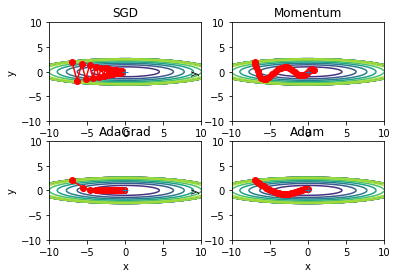

In [3]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # for simple contour line  
    mask = Z > 7
    Z[mask] = 0
    
    # plot 
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

# optimizer_compare_mnist.py

===========iteration:0===========
SGD:2.3311331587578907
Momentum:2.4068246254991035
AdaGrad:2.2692217676116715
Adam:2.1876232694219806
===========iteration:100===========
SGD:1.4504168678581542
Momentum:0.30007497656043153
AdaGrad:0.14417919717580044
Adam:0.2846519934736318
===========iteration:200===========
SGD:0.5968366330603609
Momentum:0.14965517764290232
AdaGrad:0.08421463599893211
Adam:0.15660584147532006
===========iteration:300===========
SGD:0.6493432050214468
Momentum:0.20844364204599197
AdaGrad:0.08012064673511038
Adam:0.13551803738072446
===========iteration:400===========
SGD:0.5223583884170517
Momentum:0.27508701262002233
AdaGrad:0.12099509919036289
Adam:0.2499257578555547
===========iteration:500===========
SGD:0.37121488848325535
Momentum:0.154723914974836
AdaGrad:0.051510878011358126
Adam:0.11378270740505392
===========iteration:600===========
SGD:0.34414350517699877
Momentum:0.13545402327688832
AdaGrad:0.043622908764399754
Adam:0.07571627097505257
===========iterati

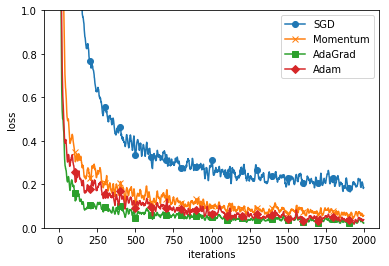

In [4]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:実験の設定==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.グラフの描画==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()


# weight_init_activation_histogram.py

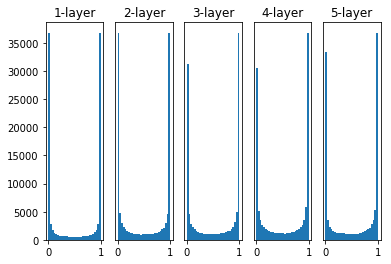

In [5]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000個のデータ
node_num = 100  # 各隠れ層のノード（ニューロン）の数
hidden_layer_size = 5  # 隠れ層が5層
activations = {}  # ここにアクティベーションの結果を格納する

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 初期値の値をいろいろ変えて実験しよう！
    w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 活性化関数の種類も変えて実験しよう！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()


# weight_init_compare.py

===========iteration:0===========
std=0.01:2.3025428200140303
Xavier:2.3038190694536116
He:2.3867111595347734
===========iteration:100===========
std=0.01:2.3024025524815235
Xavier:2.2417711011467505
He:1.2656907870841623
===========iteration:200===========
std=0.01:2.302038947940594
Xavier:2.1184102394608075
He:0.6840621170391321
===========iteration:300===========
std=0.01:2.302149182640755
Xavier:1.7252703458470564
He:0.43786178556734434
===========iteration:400===========
std=0.01:2.302281760144703
Xavier:1.1109602996005186
He:0.3329107561733291
===========iteration:500===========
std=0.01:2.301997088194655
Xavier:0.8020774293133777
He:0.35350936186145476
===========iteration:600===========
std=0.01:2.3016794336925384
Xavier:0.6210324239400593
He:0.34166761053907585
===========iteration:700===========
std=0.01:2.2999455324930045
Xavier:0.6736440023102087
He:0.42822717902202756
===========iteration:800===========
std=0.01:2.3017378488897915
Xavier:0.5410250447588839
He:0.37668714721

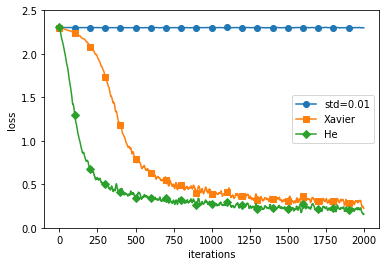

In [6]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:実験の設定==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.グラフの描画==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

# batch_norm_test.py

============== 1/16 ==============
epoch:0 | 0.093 - 0.11
epoch:1 | 0.27 - 0.105
epoch:2 | 0.357 - 0.096
epoch:3 | 0.468 - 0.098
epoch:4 | 0.508 - 0.109
epoch:5 | 0.589 - 0.097
epoch:6 | 0.614 - 0.101
epoch:7 | 0.644 - 0.1
epoch:8 | 0.698 - 0.096
epoch:9 | 0.703 - 0.101
epoch:10 | 0.746 - 0.103
epoch:11 | 0.729 - 0.098
epoch:12 | 0.777 - 0.1
epoch:13 | 0.792 - 0.102
epoch:14 | 0.814 - 0.106
epoch:15 | 0.828 - 0.099
epoch:16 | 0.851 - 0.105
epoch:17 | 0.843 - 0.108
epoch:18 | 0.858 - 0.102


No handles with labels found to put in legend.


epoch:19 | 0.861 - 0.101
============== 2/16 ==============
epoch:0 | 0.101 - 0.095
epoch:1 | 0.068 - 0.108
epoch:2 | 0.084 - 0.106
epoch:3 | 0.089 - 0.106
epoch:4 | 0.122 - 0.092
epoch:5 | 0.16 - 0.1
epoch:6 | 0.187 - 0.088
epoch:7 | 0.202 - 0.092
epoch:8 | 0.223 - 0.087
epoch:9 | 0.238 - 0.094
epoch:10 | 0.266 - 0.097
epoch:11 | 0.288 - 0.093
epoch:12 | 0.311 - 0.097
epoch:13 | 0.315 - 0.099
epoch:14 | 0.327 - 0.095
epoch:15 | 0.349 - 0.098
epoch:16 | 0.355 - 0.098
epoch:17 | 0.372 - 0.101


No handles with labels found to put in legend.


epoch:18 | 0.395 - 0.094
epoch:19 | 0.409 - 0.091
============== 3/16 ==============
epoch:0 | 0.086 - 0.118
epoch:1 | 0.083 - 0.112
epoch:2 | 0.082 - 0.114
epoch:3 | 0.088 - 0.11
epoch:4 | 0.089 - 0.111
epoch:5 | 0.091 - 0.122
epoch:6 | 0.094 - 0.115
epoch:7 | 0.093 - 0.118
epoch:8 | 0.103 - 0.121
epoch:9 | 0.109 - 0.12
epoch:10 | 0.111 - 0.114
epoch:11 | 0.114 - 0.122
epoch:12 | 0.12 - 0.126
epoch:13 | 0.127 - 0.119
epoch:14 | 0.129 - 0.118
epoch:15 | 0.131 - 0.121
epoch:16 | 0.133 - 0.121
epoch:17 | 0.133 - 0.124
epoch:18 | 0.131 - 0.124


No handles with labels found to put in legend.


epoch:19 | 0.135 - 0.119
============== 4/16 ==============
epoch:0 | 0.098 - 0.09
epoch:1 | 0.099 - 0.088
epoch:2 | 0.099 - 0.093
epoch:3 | 0.099 - 0.081
epoch:4 | 0.099 - 0.083
epoch:5 | 0.1 - 0.092
epoch:6 | 0.1 - 0.086
epoch:7 | 0.1 - 0.084
epoch:8 | 0.101 - 0.087
epoch:9 | 0.099 - 0.089
epoch:10 | 0.101 - 0.091
epoch:11 | 0.101 - 0.095
epoch:12 | 0.102 - 0.09
epoch:13 | 0.102 - 0.092
epoch:14 | 0.102 - 0.092
epoch:15 | 0.103 - 0.096
epoch:16 | 0.102 - 0.094
epoch:17 | 0.103 - 0.089


No handles with labels found to put in legend.


epoch:18 | 0.103 - 0.087
epoch:19 | 0.103 - 0.092
============== 5/16 ==============
epoch:0 | 0.091 - 0.096
epoch:1 | 0.091 - 0.105
epoch:2 | 0.091 - 0.116
epoch:3 | 0.091 - 0.105
epoch:4 | 0.091 - 0.11
epoch:5 | 0.091 - 0.1
epoch:6 | 0.091 - 0.1
epoch:7 | 0.091 - 0.105
epoch:8 | 0.091 - 0.103
epoch:9 | 0.091 - 0.105
epoch:10 | 0.091 - 0.107
epoch:11 | 0.091 - 0.106
epoch:12 | 0.091 - 0.101
epoch:13 | 0.091 - 0.107
epoch:14 | 0.091 - 0.1
epoch:15 | 0.091 - 0.104
epoch:16 | 0.091 - 0.099
epoch:17 | 0.091 - 0.103


No handles with labels found to put in legend.


epoch:18 | 0.091 - 0.11
epoch:19 | 0.091 - 0.105
============== 6/16 ==============
epoch:0 | 0.095 - 0.126
epoch:1 | 0.095 - 0.105
epoch:2 | 0.095 - 0.104
epoch:3 | 0.095 - 0.105
epoch:4 | 0.096 - 0.106
epoch:5 | 0.095 - 0.107
epoch:6 | 0.094 - 0.106
epoch:7 | 0.094 - 0.105
epoch:8 | 0.093 - 0.111
epoch:9 | 0.094 - 0.104
epoch:10 | 0.094 - 0.109
epoch:11 | 0.094 - 0.103
epoch:12 | 0.095 - 0.112
epoch:13 | 0.095 - 0.107
epoch:14 | 0.095 - 0.108
epoch:15 | 0.095 - 0.106
epoch:16 | 0.096 - 0.107
epoch:17 | 0.096 - 0.109
epoch:18 | 0.096 - 0.113


No handles with labels found to put in legend.


epoch:19 | 0.096 - 0.109
============== 7/16 ==============
epoch:0 | 0.113 - 0.073
epoch:1 | 0.109 - 0.088
epoch:2 | 0.105 - 0.124
epoch:3 | 0.105 - 0.117
epoch:4 | 0.11 - 0.108
epoch:5 | 0.107 - 0.107
epoch:6 | 0.106 - 0.105
epoch:7 | 0.105 - 0.106
epoch:8 | 0.106 - 0.111
epoch:9 | 0.108 - 0.105
epoch:10 | 0.105 - 0.111
epoch:11 | 0.105 - 0.105
epoch:12 | 0.107 - 0.108
epoch:13 | 0.107 - 0.112
epoch:14 | 0.107 - 0.11
epoch:15 | 0.105 - 0.108
epoch:16 | 0.106 - 0.108
epoch:17 | 0.109 - 0.105


No handles with labels found to put in legend.


epoch:18 | 0.11 - 0.107
epoch:19 | 0.113 - 0.109
============== 8/16 ==============
epoch:0 | 0.079 - 0.1
epoch:1 | 0.119 - 0.1
epoch:2 | 0.116 - 0.12
epoch:3 | 0.116 - 0.127
epoch:4 | 0.116 - 0.128
epoch:5 | 0.116 - 0.127
epoch:6 | 0.116 - 0.124
epoch:7 | 0.118 - 0.127
epoch:8 | 0.118 - 0.127
epoch:9 | 0.118 - 0.136
epoch:10 | 0.092 - 0.13
epoch:11 | 0.118 - 0.133
epoch:12 | 0.117 - 0.123
epoch:13 | 0.117 - 0.128
epoch:14 | 0.116 - 0.129
epoch:15 | 0.116 - 0.13
epoch:16 | 0.114 - 0.138
epoch:17 | 0.116 - 0.128
epoch:18 | 0.116 - 0.131


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.133
============== 9/16 ==============
epoch:0 | 0.116 - 0.1
epoch:1 | 0.117 - 0.107
epoch:2 | 0.117 - 0.122
epoch:3 | 0.117 - 0.13
epoch:4 | 0.117 - 0.117
epoch:5 | 0.117 - 0.117
epoch:6 | 0.117 - 0.122
epoch:7 | 0.117 - 0.124
epoch:8 | 0.117 - 0.125
epoch:9 | 0.117 - 0.118
epoch:10 | 0.117 - 0.112
epoch:11 | 0.117 - 0.128
epoch:12 | 0.117 - 0.116
epoch:13 | 0.117 - 0.124
epoch:14 | 0.117 - 0.126
epoch:15 | 0.117 - 0.127
epoch:16 | 0.117 - 0.128
epoch:17 | 0.117 - 0.13


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.136
epoch:19 | 0.117 - 0.138
============== 10/16 ==============
epoch:0 | 0.105 - 0.087
epoch:1 | 0.117 - 0.107
epoch:2 | 0.116 - 0.105
epoch:3 | 0.116 - 0.105
epoch:4 | 0.116 - 0.111
epoch:5 | 0.116 - 0.111
epoch:6 | 0.116 - 0.108
epoch:7 | 0.116 - 0.11
epoch:8 | 0.116 - 0.115
epoch:9 | 0.116 - 0.114
epoch:10 | 0.116 - 0.112
epoch:11 | 0.116 - 0.115
epoch:12 | 0.116 - 0.11
epoch:13 | 0.116 - 0.114
epoch:14 | 0.116 - 0.114
epoch:15 | 0.116 - 0.114
epoch:16 | 0.116 - 0.118
epoch:17 | 0.116 - 0.116
epoch:18 | 0.116 - 0.119


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.116
============== 11/16 ==============
epoch:0 | 0.1 - 0.123
epoch:1 | 0.116 - 0.142
epoch:2 | 0.116 - 0.179
epoch:3 | 0.116 - 0.173
epoch:4 | 0.116 - 0.176
epoch:5 | 0.116 - 0.176
epoch:6 | 0.117 - 0.181
epoch:7 | 0.116 - 0.188
epoch:8 | 0.116 - 0.191
epoch:9 | 0.116 - 0.194
epoch:10 | 0.116 - 0.198
epoch:11 | 0.116 - 0.202
epoch:12 | 0.116 - 0.209
epoch:13 | 0.117 - 0.206
epoch:14 | 0.117 - 0.207
epoch:15 | 0.117 - 0.22
epoch:16 | 0.117 - 0.226
epoch:17 | 0.117 - 0.222
epoch:18 | 0.117 - 0.228


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.228
============== 12/16 ==============
epoch:0 | 0.116 - 0.127
epoch:1 | 0.117 - 0.111
epoch:2 | 0.117 - 0.123
epoch:3 | 0.116 - 0.12
epoch:4 | 0.116 - 0.121
epoch:5 | 0.116 - 0.134
epoch:6 | 0.116 - 0.142
epoch:7 | 0.117 - 0.145
epoch:8 | 0.117 - 0.156
epoch:9 | 0.117 - 0.161
epoch:10 | 0.117 - 0.171
epoch:11 | 0.117 - 0.175
epoch:12 | 0.117 - 0.186
epoch:13 | 0.117 - 0.193
epoch:14 | 0.117 - 0.2
epoch:15 | 0.117 - 0.202
epoch:16 | 0.117 - 0.217
epoch:17 | 0.117 - 0.23


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.239
epoch:19 | 0.117 - 0.254
============== 13/16 ==============
epoch:0 | 0.117 - 0.087
epoch:1 | 0.116 - 0.092
epoch:2 | 0.116 - 0.122
epoch:3 | 0.116 - 0.152
epoch:4 | 0.116 - 0.172
epoch:5 | 0.116 - 0.183
epoch:6 | 0.116 - 0.192
epoch:7 | 0.116 - 0.204
epoch:8 | 0.116 - 0.216
epoch:9 | 0.116 - 0.233
epoch:10 | 0.116 - 0.254
epoch:11 | 0.117 - 0.268
epoch:12 | 0.116 - 0.284
epoch:13 | 0.116 - 0.286
epoch:14 | 0.117 - 0.308
epoch:15 | 0.116 - 0.323
epoch:16 | 0.116 - 0.33
epoch:17 | 0.116 - 0.345


No handles with labels found to put in legend.


epoch:18 | 0.116 - 0.366
epoch:19 | 0.116 - 0.369
============== 14/16 ==============
epoch:0 | 0.099 - 0.103
epoch:1 | 0.116 - 0.102
epoch:2 | 0.117 - 0.1
epoch:3 | 0.117 - 0.103
epoch:4 | 0.117 - 0.122
epoch:5 | 0.117 - 0.153
epoch:6 | 0.117 - 0.171
epoch:7 | 0.117 - 0.211
epoch:8 | 0.117 - 0.228
epoch:9 | 0.117 - 0.248
epoch:10 | 0.117 - 0.275
epoch:11 | 0.117 - 0.298
epoch:12 | 0.117 - 0.318
epoch:13 | 0.117 - 0.338
epoch:14 | 0.117 - 0.353
epoch:15 | 0.117 - 0.374
epoch:16 | 0.117 - 0.389
epoch:17 | 0.117 - 0.404
epoch:18 | 0.117 - 0.423


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.435
============== 15/16 ==============
epoch:0 | 0.117 - 0.081
epoch:1 | 0.105 - 0.111
epoch:2 | 0.117 - 0.14
epoch:3 | 0.116 - 0.16
epoch:4 | 0.117 - 0.181
epoch:5 | 0.116 - 0.2
epoch:6 | 0.116 - 0.226
epoch:7 | 0.116 - 0.251
epoch:8 | 0.116 - 0.274
epoch:9 | 0.116 - 0.295
epoch:10 | 0.116 - 0.317
epoch:11 | 0.116 - 0.333
epoch:12 | 0.116 - 0.357
epoch:13 | 0.116 - 0.382
epoch:14 | 0.116 - 0.4
epoch:15 | 0.116 - 0.416
epoch:16 | 0.116 - 0.448
epoch:17 | 0.116 - 0.46


No handles with labels found to put in legend.


epoch:18 | 0.116 - 0.482
epoch:19 | 0.116 - 0.493
============== 16/16 ==============
epoch:0 | 0.099 - 0.097
epoch:1 | 0.116 - 0.073
epoch:2 | 0.116 - 0.09
epoch:3 | 0.116 - 0.096
epoch:4 | 0.105 - 0.091
epoch:5 | 0.116 - 0.092
epoch:6 | 0.117 - 0.104
epoch:7 | 0.116 - 0.104
epoch:8 | 0.117 - 0.107
epoch:9 | 0.117 - 0.11
epoch:10 | 0.117 - 0.119
epoch:11 | 0.117 - 0.13
epoch:12 | 0.117 - 0.139
epoch:13 | 0.117 - 0.145
epoch:14 | 0.117 - 0.155
epoch:15 | 0.117 - 0.161
epoch:16 | 0.117 - 0.164
epoch:17 | 0.117 - 0.175
epoch:18 | 0.117 - 0.182
epoch:19 | 0.117 - 0.196


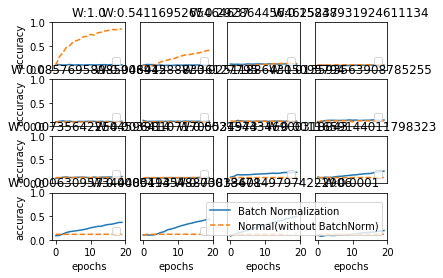

In [12]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 学習データを削減
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.00001


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 3.グラフの描画==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()

# batch_norm_gradient_check.py

In [13]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100], output_size=10,
                              use_batchnorm=True)

x_batch = x_train[:1]
t_batch = t_train[:1]

grad_backprop = network.gradient(x_batch, t_batch)
grad_numerical = network.numerical_gradient(x_batch, t_batch)


for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))

W1:0.0
b1:0.0
gamma1:0.0
beta1:0.0
W2:0.0
b2:0.0
gamma2:0.0
beta2:0.054340090364846105
W3:0.0
b3:1.7990402263745597e-07


# overfit_dropout.py

train loss:2.2940293190347183
=== epoch:1, train acc:0.07333333333333333, test acc:0.0851 ===
train loss:2.3115202832559434
train loss:2.314732112470118
train loss:2.309086177363044
=== epoch:2, train acc:0.07666666666666666, test acc:0.0852 ===
train loss:2.3012334140895203
train loss:2.3090018154362015
train loss:2.2974149243267554
=== epoch:3, train acc:0.08, test acc:0.0856 ===
train loss:2.296730794866736
train loss:2.2953966906601986
train loss:2.291364054069297
=== epoch:4, train acc:0.07666666666666666, test acc:0.0855 ===
train loss:2.294775821872901
train loss:2.2999283814402656
train loss:2.2916150471706933
=== epoch:5, train acc:0.07666666666666666, test acc:0.0853 ===
train loss:2.2953900731382464
train loss:2.293006138294076
train loss:2.292213950100272
=== epoch:6, train acc:0.09, test acc:0.0884 ===
train loss:2.2898976563581956
train loss:2.2940065924049846
train loss:2.299458487799588
=== epoch:7, train acc:0.1, test acc:0.0893 ===
train loss:2.2947166137197343
train 

=== epoch:57, train acc:0.19666666666666666, test acc:0.1738 ===
train loss:2.2288608384085644
train loss:2.2179411400565234
train loss:2.2514392200198774
=== epoch:58, train acc:0.19666666666666666, test acc:0.1726 ===
train loss:2.2303133065560683
train loss:2.2538353952557215
train loss:2.224622441211453
=== epoch:59, train acc:0.20333333333333334, test acc:0.1746 ===
train loss:2.262901819989093
train loss:2.2205541901655033
train loss:2.2361544958734125
=== epoch:60, train acc:0.20333333333333334, test acc:0.1797 ===
train loss:2.219677962929845
train loss:2.214821295614137
train loss:2.2507881873286437
=== epoch:61, train acc:0.20666666666666667, test acc:0.1804 ===
train loss:2.2418576479900834
train loss:2.2335379789027137
train loss:2.2054042820698463
=== epoch:62, train acc:0.21, test acc:0.1839 ===
train loss:2.2310553106906768
train loss:2.221616766758115
train loss:2.2352057446894387
=== epoch:63, train acc:0.21, test acc:0.1854 ===
train loss:2.246383829268012
train loss:

=== epoch:113, train acc:0.32, test acc:0.2467 ===
train loss:2.091962458386716
train loss:2.088525125820414
train loss:2.0993811070779747
=== epoch:114, train acc:0.32666666666666666, test acc:0.2484 ===
train loss:2.1308114390708415
train loss:2.0827997474712094
train loss:2.1100431022512756
=== epoch:115, train acc:0.32666666666666666, test acc:0.2498 ===
train loss:2.095238773472579
train loss:2.09294929177695
train loss:2.1284483017741382
=== epoch:116, train acc:0.33, test acc:0.2506 ===
train loss:2.1224800645431983
train loss:2.0783342728779246
train loss:2.0853859824948415
=== epoch:117, train acc:0.3333333333333333, test acc:0.255 ===
train loss:2.0819543734092116
train loss:2.0701894395381384
train loss:2.1042574001996006
=== epoch:118, train acc:0.32666666666666666, test acc:0.2534 ===
train loss:2.1085236015763384
train loss:2.0830160227666754
train loss:2.0729882370686714
=== epoch:119, train acc:0.3433333333333333, test acc:0.2557 ===
train loss:2.039347794384658
train l

=== epoch:169, train acc:0.49666666666666665, test acc:0.3791 ===
train loss:1.840520502826984
train loss:1.7494445626894437
train loss:1.763557662045089
=== epoch:170, train acc:0.49333333333333335, test acc:0.3766 ===
train loss:1.7199695314053027
train loss:1.8269411601820529
train loss:1.8121982461184294
=== epoch:171, train acc:0.5, test acc:0.3794 ===
train loss:1.6680558053588599
train loss:1.8540902250067175
train loss:1.6555366815764692
=== epoch:172, train acc:0.49666666666666665, test acc:0.3783 ===
train loss:1.740969775010477
train loss:1.8980516223755108
train loss:1.7295875623074333
=== epoch:173, train acc:0.49666666666666665, test acc:0.3822 ===
train loss:1.7217270730300362
train loss:1.875560568261006
train loss:1.7987038236647075
=== epoch:174, train acc:0.49666666666666665, test acc:0.3826 ===
train loss:1.7880035108165102
train loss:1.7107733220324273
train loss:1.7675199873474008
=== epoch:175, train acc:0.5, test acc:0.3858 ===
train loss:1.7975307134036211
trai

=== epoch:224, train acc:0.61, test acc:0.4849 ===
train loss:1.303299988610344
train loss:1.4294239080494242
train loss:1.414812980979332
=== epoch:225, train acc:0.6233333333333333, test acc:0.4877 ===
train loss:1.3811942539190492
train loss:1.3576942591376107
train loss:1.4361248357037508
=== epoch:226, train acc:0.6133333333333333, test acc:0.4847 ===
train loss:1.4000208138099135
train loss:1.4245738985868865
train loss:1.3061516783844072
=== epoch:227, train acc:0.62, test acc:0.4878 ===
train loss:1.4118851616934756
train loss:1.3832159908609072
train loss:1.4217802896275322
=== epoch:228, train acc:0.6233333333333333, test acc:0.4909 ===
train loss:1.439896811271881
train loss:1.321740868669365
train loss:1.428996635010925
=== epoch:229, train acc:0.6166666666666667, test acc:0.492 ===
train loss:1.236456586351303
train loss:1.3047115135661531
train loss:1.3087478938288708
=== epoch:230, train acc:0.6133333333333333, test acc:0.4897 ===
train loss:1.3428322993958381
train loss

=== epoch:280, train acc:0.71, test acc:0.5858 ===
train loss:1.025549170931046
train loss:0.9617279978472908
train loss:0.9021773589906681
=== epoch:281, train acc:0.7066666666666667, test acc:0.5847 ===
train loss:0.9595953827595202
train loss:1.0176384529032434
train loss:1.0176741691627706
=== epoch:282, train acc:0.7166666666666667, test acc:0.5848 ===
train loss:0.953507951338137
train loss:0.9779003270770202
train loss:1.0036700831169476
=== epoch:283, train acc:0.7166666666666667, test acc:0.5857 ===
train loss:0.9352904336099909
train loss:0.9550555189834016
train loss:0.9611036408461644
=== epoch:284, train acc:0.7166666666666667, test acc:0.588 ===
train loss:0.9542958944694417
train loss:0.8817374980344113
train loss:0.8816302040252522
=== epoch:285, train acc:0.7166666666666667, test acc:0.5883 ===
train loss:0.9788194493544509
train loss:0.948273146890961
train loss:0.8787786170591506
=== epoch:286, train acc:0.7233333333333334, test acc:0.5898 ===
train loss:0.8993846132

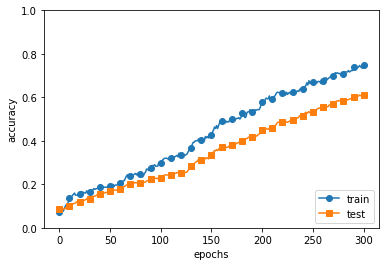

In [8]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# Dropuoutの有無、割り合いの設定 ========================
use_dropout = True  # Dropoutなしのときの場合はFalseに
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

# overfit_weight_decay.py

epoch:0, train acc:0.09666666666666666, test acc:0.0993
epoch:1, train acc:0.10666666666666667, test acc:0.1028
epoch:2, train acc:0.12, test acc:0.1141
epoch:3, train acc:0.14666666666666667, test acc:0.1268
epoch:4, train acc:0.19333333333333333, test acc:0.1564
epoch:5, train acc:0.26666666666666666, test acc:0.2025
epoch:6, train acc:0.3466666666666667, test acc:0.2389
epoch:7, train acc:0.36666666666666664, test acc:0.2569
epoch:8, train acc:0.44, test acc:0.3025
epoch:9, train acc:0.48, test acc:0.3284
epoch:10, train acc:0.51, test acc:0.3534
epoch:11, train acc:0.5233333333333333, test acc:0.3651
epoch:12, train acc:0.54, test acc:0.3827
epoch:13, train acc:0.5266666666666666, test acc:0.381
epoch:14, train acc:0.5166666666666667, test acc:0.3808
epoch:15, train acc:0.5533333333333333, test acc:0.4157
epoch:16, train acc:0.56, test acc:0.4293
epoch:17, train acc:0.54, test acc:0.4268
epoch:18, train acc:0.5666666666666667, test acc:0.4404
epoch:19, train acc:0.5833333333333334,

epoch:161, train acc:0.96, test acc:0.7464
epoch:162, train acc:0.9433333333333334, test acc:0.7433
epoch:163, train acc:0.94, test acc:0.7374
epoch:164, train acc:0.9433333333333334, test acc:0.7429
epoch:165, train acc:0.9466666666666667, test acc:0.7441
epoch:166, train acc:0.9533333333333334, test acc:0.7454
epoch:167, train acc:0.9333333333333333, test acc:0.736
epoch:168, train acc:0.95, test acc:0.7442
epoch:169, train acc:0.9433333333333334, test acc:0.74
epoch:170, train acc:0.9466666666666667, test acc:0.7454
epoch:171, train acc:0.95, test acc:0.7482
epoch:172, train acc:0.95, test acc:0.7451
epoch:173, train acc:0.9533333333333334, test acc:0.7486
epoch:174, train acc:0.95, test acc:0.7509
epoch:175, train acc:0.95, test acc:0.7453
epoch:176, train acc:0.9466666666666667, test acc:0.7501
epoch:177, train acc:0.9466666666666667, test acc:0.7501
epoch:178, train acc:0.95, test acc:0.7441
epoch:179, train acc:0.94, test acc:0.7454
epoch:180, train acc:0.95, test acc:0.7428
epo

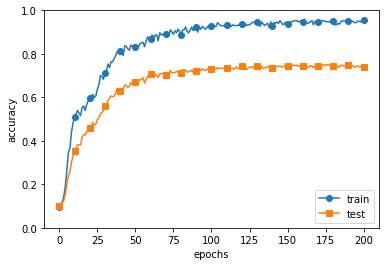

In [7]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（荷重減衰）の設定 =======================
#weight_decay_lambda = 0 # weight decayを使用しない場合
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

# hyperparameter_optimization.py

val acc:0.05 | lr:8.048662968262106e-06, weight decay:1.3463890870895324e-07
val acc:0.72 | lr:0.00648875986940831, weight decay:3.4890190583782953e-08
val acc:0.1 | lr:0.0006458521456130764, weight decay:1.1541752916951432e-07
val acc:0.03 | lr:0.00016057448766064025, weight decay:5.248771683040226e-08
val acc:0.08 | lr:1.6281821902945654e-06, weight decay:1.4430615087645052e-06
val acc:0.24 | lr:0.0005148932193615796, weight decay:9.34890300524541e-08
val acc:0.17 | lr:1.1973728452243635e-05, weight decay:1.5138859033016187e-05
val acc:0.11 | lr:1.2331313002922916e-05, weight decay:3.772388705081803e-08
val acc:0.13 | lr:3.0425085296676814e-05, weight decay:5.2922266918612905e-06
val acc:0.71 | lr:0.006742837828415346, weight decay:5.157372494560458e-06
val acc:0.22 | lr:0.0006599693613603067, weight decay:2.43549924335404e-07
val acc:0.13 | lr:0.00011296821344183892, weight decay:4.888008925899626e-07
val acc:0.1 | lr:9.78744653572786e-06, weight decay:9.344193267352063e-08
val acc:

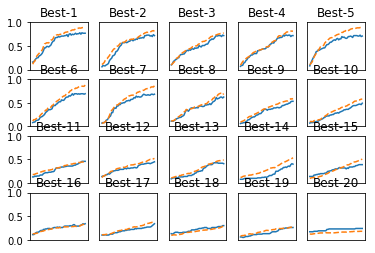

In [14]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 高速化のため訓練データの削減
x_train = x_train[:500]
t_train = t_train[:500]

# 検証データの分離
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# ハイパーパラメータのランダム探索======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 探索したハイパーパラメータの範囲を指定===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# グラフの描画========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()
